# Исследование и прогнозирование оттока клиентов банка

## **Цель**:
Разработать модель машинного обучения для прогнозирования оттока клиентов банка на основе их характеристик, чтобы помочь бизнесу снизить потери и улучшить стратегии удержания клиентов.

---
## **Описание проекта**
1. **EDA (Exploratory Data Analysis):**
   - Анализ данных клиентов банка для выявления ключевых факторов, влияющих на отток.
   - Визуализация распределений, корреляций и аномалий в данных.
2. **Прогнозирование оттока:**
   - Построение и сравнение классических моделей машинного обучения (логистическая регрессия, случайный лес, градиентный бустинг и др.).
   - Оптимизация гиперпараметров и оценка качества моделей с учетом дисбаланса классов.

Источник данных:
https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset?resource=download

---

## **Вопросы по EDA**
1. **Распределение клиентов:**
   - Как распределены клиенты по странам, полу и возрасту? Есть ли дисбаланс?
   - Сколько клиентов ушло (churn=1) vs осталось (churn=0)?

2. **Финансовые показатели:**
   - Как баланс на счете (balance) связан с оттоком? Есть ли разница в балансах между ушедшими и оставшимися клиентами?
   - Влияет ли кредитный рейтинг (credit_score) на вероятность оттока?
   - Есть ли связь между зарплатой (estimated_salary) и оттоком?

3. **Продукты и активность:**
   - Как количество продуктов (products_number) влияет на отток?
   - Чаще ли уходят клиенты без кредитной карты (credit_card=0)?
   - Как активность клиента (active_member) связана с оттоком?

4. **Демография и поведение:**
   - Есть ли зависимость между возрастом (age) и оттоком?
   - Как срок сотрудничества с банком (tenure) влияет на вероятность ухода?

5. **Корреляции и взаимодействия:**
   - Какие признаки наиболее сильно коррелируют с оттоком?
   - Есть ли связь между страной (country) и оттоком?
   - Как комбинация признаков (например, возраст + баланс) влияет на отток?

---

## **Вопросы по прогнозированию**
1. **Подготовка данных:**
   - Как кодировать категориальные признаки (country, gender)?
   - Нужно ли масштабировать числовые признаки (age, balance)?

2. **Борьба с дисбалансом:**
   - Какой метод лучше: oversampling (SMOTE), undersampling или веса классов?
   - Какие метрики (F1, ROC-AUC) использовать для оценки качества?

3. **Выбор модели:**
   - Какая модель (логистическая регрессия, случайный лес, XGBoost) дает лучший результат?
   - Как сравнить важность признаков в разных моделях?

4. **Оптимизация:**
   - Какие гиперпараметры (глубина деревьев, learning rate) улучшают качество?
   - Как использовать кросс-валидацию для оценки устойчивости модели?

5. **Оценка:**
   - Какая модель лучше работает на тестовой выборке: точность vs полнота?
   - Как интерпретировать матрицу ошибок для бизнеса?

6. **Деплоймент:**
   - Какие признаки наиболее критичны для прогноза?
   - Можно ли упростить модель без потери качества?

---
## **Описание полей таблицы**

1. **customer_id** (Идентификатор клиента)
   - Уникальный идентификатор клиента в системе банка.

2. **credit_score** (Кредитный рейтинг)
   - Числовой показатель, отражающий кредитоспособность клиента (чем выше, тем лучше).

3. **country** (Страна)
   - Страна проживания клиента (например, Германия, Франция, Испания).

4. **gender** (Пол)
   - Пол клиента (мужчина/женщина).

5. **age** (Возраст)
   - Возраст клиента в годах.

6. **tenure** (Срок сотрудничества)
   - Количество лет, в течение которых клиент пользуется услугами банка.

7. **balance** (Баланс на счете)
   - Сумма денег на счете клиента.

8. **products_number** (Количество продуктов)
   - Количество банковских продуктов, которыми пользуется клиент (например, депозит, кредит, ипотека).

9. **credit_card** (Наличие кредитной карты)
   - Бинарный признак: 1 — у клиента есть кредитная карта, 0 — нет.

10. **active_member** (Активный клиент)
    - Бинарный признак: 1 — клиент активно пользуется услугами банка, 0 — неактивен.

11. **estimated_salary** (Предполагаемая зарплата)
    - Оценка годового дохода клиента.

12. **churn** (Отток)
    - Целевая переменная: 1 — клиент ушел из банка, 0 — клиент остался.

Импортируем библиотеки:

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.io as pio

# графики статические "png" или интерактивные "notebook"
pio.renderers.default = "png"

Чтение данных и определение функции для диагностики df:

In [286]:
# чтение
df = pd.read_csv('data\\bank_customer.csv', sep = ',')

# определение функции
def df_diagnostics(df1, target_col=None, iqr_coefficient=1.5):
    # Собираем основные характеристики столбцов
    diag = pd.DataFrame({
        'dtypes': df1.dtypes,
        'count': df1.count(),
        'unique': df1.nunique(),
        'nan_count': df1.isnull().sum(),
        'nan_%': df1.isnull().sum() / df1.shape[0] * 100})

    # Словарь описывающий, какую функцию применить для каждой метрики
    metrics = {
        'mean': lambda s: s.mean(),
        'median': lambda s: s.median(),
        'mode': lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan,
        'std': lambda s: s.std(),
        'min': lambda s: s.min(),
        '25%': lambda s: s.quantile(0.25), # 25% квартиль
        '50%': lambda s: s.quantile(0.50), # 50% квартиль (медиана)
        '75%': lambda s: s.quantile(0.75), # 75% квартиль
        'max': lambda s: s.max()}

    # Вычисляем метрики только для числовых столбцов
    numeric_cols = df1.select_dtypes(include=[np.number]).columns
    for metric, func in metrics.items():
        diag[metric] = [func(df1[col]) if col in numeric_cols else np.nan
                        for col in df1.columns]

    # Подсчёт количества выбросов с регулируемым коэффициентом IQR
    def count_outliers_iqr(col, iqr_coef=iqr_coefficient):
        if pd.api.types.is_numeric_dtype(col) and not pd.api.types.is_bool_dtype(col):
            Q1 = col.quantile(0.25)
            Q3 = col.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_coef * IQR
            upper_bound = Q3 + iqr_coef * IQR
            return ((col < lower_bound) | (col > upper_bound)).sum()
        else:
            return np.nan

    # Применяем функцию count_outliers_iqr только к числовым столбцам
    diag['outliers_count'] = [
        count_outliers_iqr(df1[col]) if pd.api.types.is_numeric_dtype(df1[col]) and not pd.api.types.is_bool_dtype(df1[col]) else np.nan
        for col in df1.columns]

    # Количество строк с пропущенными значениями в целевой переменной (если она указана)
    if target_col is not None:
        rows_with_nan_target = df1[target_col].isnull().sum()
        diag['rows_nan_target'] = [rows_with_nan_target] * len(df1.columns)

    # Добавляем корреляцию с целевой переменной (если она указана)
    if target_col is not None and pd.api.types.is_numeric_dtype(df1[target_col]):
        diag['corr_with_target'] = [df1[col].corr(df1[target_col]) if pd.api.types.is_numeric_dtype(df1[col]) else np.nan
                                      for col in df1.columns]

    # Вычисляем количество дублирующих строк в df
    duplicates_count = df1.duplicated().sum()
    print("Количество дублирующих строк:", duplicates_count,
          f"\nOutliers_count: Выбросы в данных более IQR * {iqr_coefficient}")

    # Возвращаем df с градиентной подсветкой, форматированием и округлением чисел
    return (diag.style.background_gradient(cmap='Set3', low=0.1, high=0.01)
            .format("{:.2f}", subset=diag.select_dtypes(include=[np.number]).columns))

---
## Обзор таблиц


In [287]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Информация о таблицах

In [288]:
df_diagnostics(df)

Количество дублирующих строк: 0 
Outliers_count: Выбросы в данных более IQR * 1.5


,dtypes,count,unique,nan_count,nan_%,mean,median,mode,std,min,25%,50%,75%,max,outliers_count
customer_id,int64,10000.00,10000.00,0.00,0.00,15690940.57,15690738.00,15565701.00,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00,0.00
credit_score,int64,10000.00,460.00,0.00,0.00,650.53,652.00,850.00,96.65,350.00,584.00,652.00,718.00,850.00,15.00
country,object,10000.00,3.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
gender,object,10000.00,2.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,int64,10000.00,70.00,0.00,0.00,38.92,37.00,37.00,10.49,18.00,32.00,37.00,44.00,92.00,359.00
tenure,int64,10000.00,11.00,0.00,0.00,5.01,5.00,2.00,2.89,0.00,3.00,5.00,7.00,10.00,0.00
balance,float64,10000.00,6382.00,0.00,0.00,76485.89,97198.54,0.00,62397.41,0.00,0.00,97198.54,127644.24,250898.09,0.00
products_number,int64,10000.00,4.00,0.00,0.00,1.53,1.00,1.00,0.58,1.00,1.00,1.00,2.00,4.00,60.00
credit_card,int64,10000.00,2.00,0.00,0.00,0.71,1.00,1.00,0.46,0.00,0.00,1.00,1.00,1.00,0.00
active_member,int64,10000.00,2.00,0.00,0.00,0.52,1.00,1.00,0.50,0.00,0.00,1.00,1.00,1.00,0.00


Анализ информации о таблице показал, что:
- клиенты банка по полю `customer_id` все уникальные
- имена полей корректные
- типы данных в полях корректны
- в каждом поле по 10 000 значений, пропусков нет
- в некоторых полях есть выбросы при расчёте по методу IQR * 1.5

Построим гистограммы распределений всех числовых полей:

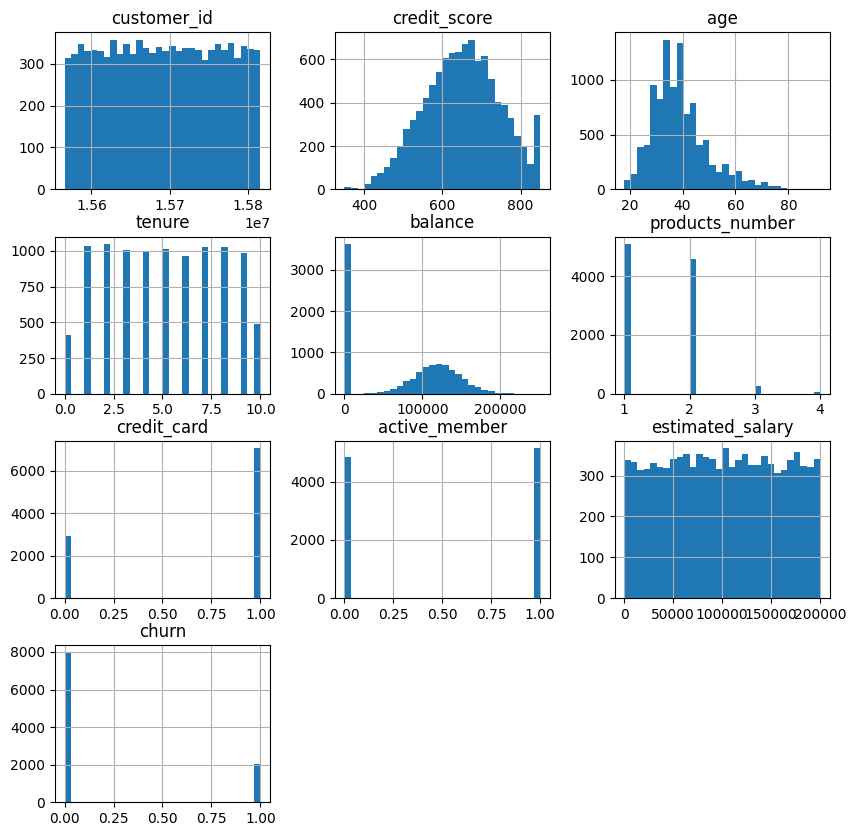

In [289]:
df.hist(bins=30, figsize=(10, 10))
plt.show()

`Вывод` данные таблицы и информация о ней изучена. Как таковая предобработка данных не требуется.

---
# Исследование клиентов банка

## Распределения клиентов

Определим функцию для построения гистограммы:

In [290]:
def plots_histogram(df, col_name, title, xaxis_title, yaxis_title, color=None, barmode='relative',
                    width=980, text_auto=False, marginal=None, labels=None, range_x=None, range_y=None):
    fig = px.histogram(df, x=col_name, color=color, title=title, marginal=marginal,
                       barmode=barmode, text_auto=text_auto, labels=labels, range_x=range_x, range_y=range_y)
    fig.update_layout(width=width, height=400, margin=dict(t=40, b=10, l=10, r=10),
                      xaxis_title=xaxis_title, yaxis_title=yaxis_title, bargap=0.1)
    pyo.iplot(fig)
    return None

Определим функцию для построения графика баров:

In [291]:
def plots_bar_pie(data, x_column_cat, xaxis_title, yaxis_title, title, single=False,
                  aggregation='count', y_column=None, y_range=False, round_labels=0,
                  size_plot=False):
    """Строит столбчатую и круговую диаграммы для категоризованных данных.
    :param data: DataFrame с данными.
    :param x_column_cat: Название столбца для категоризации.
    :param xaxis_title: Заголовок оси X.
    :param yaxis_title: Заголовок оси Y.
    :param title: Заголовок графика.
    :param single: Если True, строит только столбчатую диаграмму. По умолчанию False.
    :param aggregation: Функция агрегации ('count', 'sum', 'mean', 'median' и т.д.). По умолчанию 'count'.
    :param y_column: Название столбца для оси Y. Если не указан, используется количество значений.
    :param y_range: Диапазон значений для оси Y в виде списка [min, max]. По умолчанию False (автоматический диапазон).
    :param round_labels: Степень округления значений в подписях меток. По умолчанию 1.
    :param size_plot: Размер графика в виде списка [width, height]. По умолчанию False (используются стандартные размеры).
    """

    # Применение функции агрегации
    if y_column is None:
        # Если y_column не указан, используем количество значений
        category_counts = data[x_column_cat].value_counts().sort_index()
    else:
        # Если y_column указан, применяем агрегацию к указанному столбцу
        category_counts = data.groupby(x_column_cat, observed=False)[y_column].agg(aggregation)

    # Округление значений для подписей меток
    category_counts_rounded = category_counts.round(round_labels)

    # Создание subplot
    if single:
        fig = make_subplots(rows=1, cols=1, column_titles=[title,])
    else:
        fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]],
                           horizontal_spacing=0, column_titles=[title, 'Диаграмма удельного веса'])

    # Добавление столбчатой диаграммы
    fig.add_trace(go.Bar(x=category_counts.index, y=category_counts.values,
                        text=category_counts_rounded.values, textposition='auto',
                        name='Удельный вес'), row=1, col=1)

    # Добавление круговой диаграммы (если single=False)
    if not single:
        fig.add_trace(go.Pie(labels=category_counts.index, values=category_counts.values), row=1, col=2)

    # Настройка макета
    layout_kwargs = {
        'margin': dict(t=40, b=10, l=10, r=10),
        'xaxis_title': xaxis_title,
        'yaxis_title': yaxis_title}

    # Если передан size_plot, используем его для width и height
    if size_plot:
        layout_kwargs['width'] = size_plot[0]
        layout_kwargs['height'] = size_plot[1]
    else:
        # Иначе используем стандартные размеры
        layout_kwargs['width'] = 980 if not single else 600
        layout_kwargs['height'] = 400

    # Если передан y_range, добавляем его в настройки макета
    if y_range:
        layout_kwargs['yaxis'] = {'range': y_range}

    fig.update_layout(**layout_kwargs)
    pyo.iplot(fig)
    return None

---
Изучим как клиенты распределены по странам:

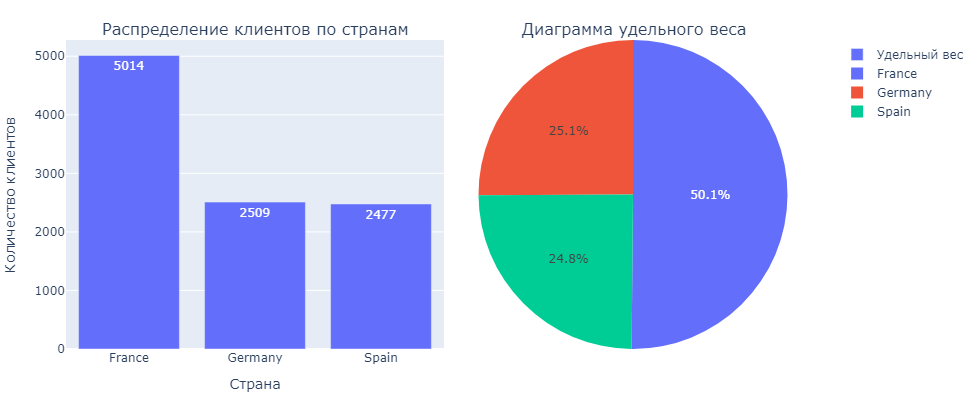

In [292]:
plots_bar_pie(df, 'country', "Страна", "Количество клиентов", 'Распределение клиентов по странам')

`Вывод:` 50.1% клиентов банка из Франции, 25.1% из Германии и 24.8% из Испании.

`! Проблема`: Идеально ровные доли клиентов в странах. Требуется обработка функцией для рандомизации стран по клиентам!

Изучим как клиенты распределены по полу:

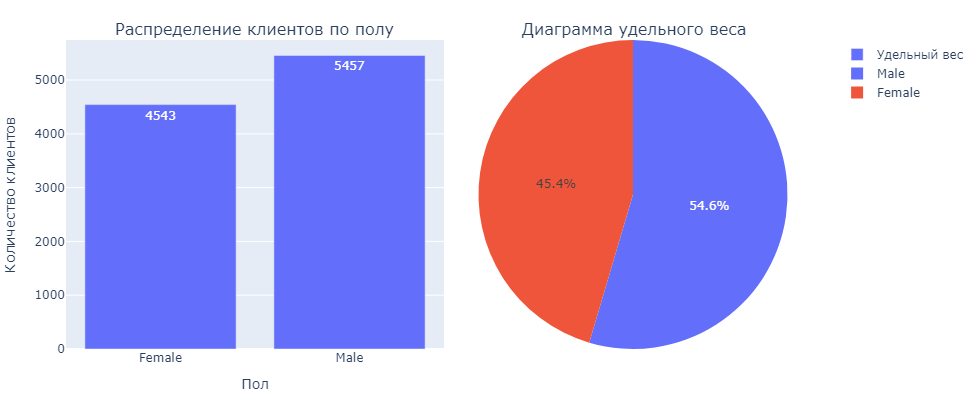

In [293]:
plots_bar_pie(df, 'gender', "Пол", "Количество клиентов", 'Распределение клиентов по полу')

`Вывод:` 54.6% клиентов это мужчины и 45.4% это женщины.

Изучим как клиенты распределены по возрасту:

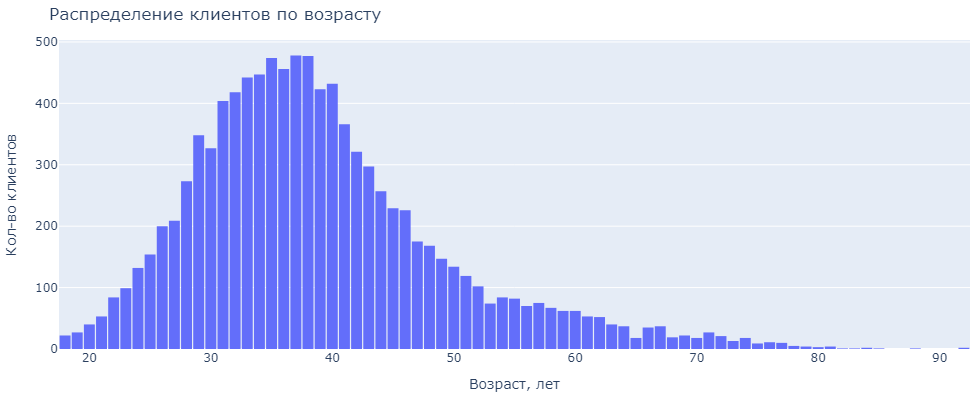

In [294]:
plots_histogram(df, "age", 'Распределение клиентов по возрасту',"Возраст, лет", "Кол-во клиентов")

`Вывод:` большая часть клиентов банка от 30 до 40-45 лет.

Изучим как возраст клиентов распределен с учётом пола:

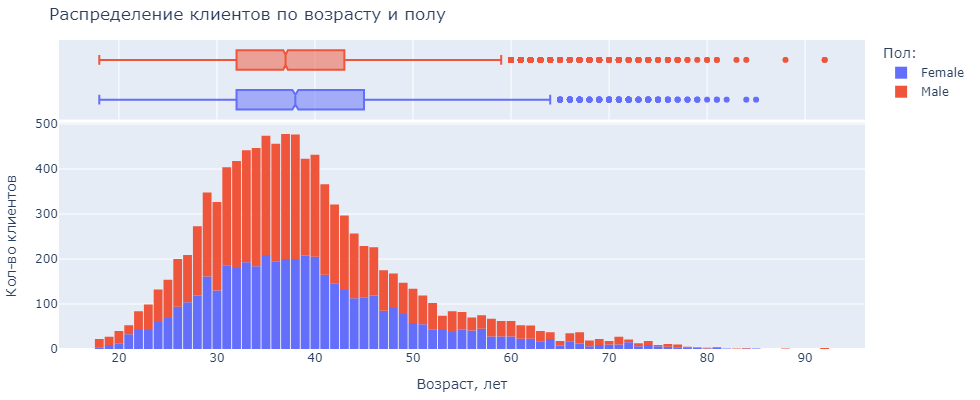

In [295]:
plots_histogram(df, "age", 'Распределение клиентов по возрасту и полу',"Возраст, лет", "Кол-во клиентов",
                color="gender", marginal="box", labels={'gender': 'Пол:'})

`Вывод:` возраст клиентов по полу распределён примерно одинаково. Можно выделить, что медианный возраст женщин немного выше.

Изучим как клиенты распределены по странам с учётом пола:

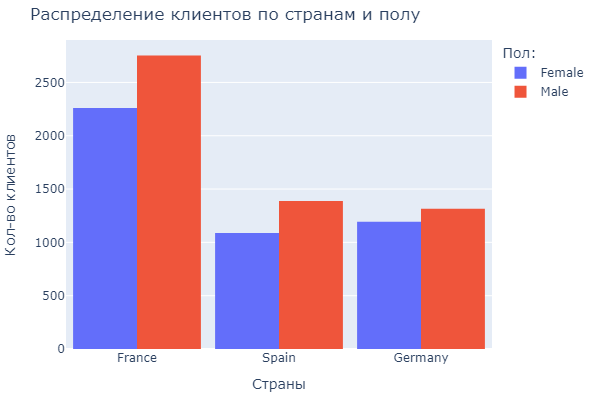

In [296]:
plots_histogram(df, "country", 'Распределение клиентов по странам и полу',"Страны", "Кол-во клиентов",
                color="gender", barmode="group", width=600, labels={'gender': 'Пол:'})

`Вывод:` в каждой стране клиентов мужчин в среднем больше.

Изучим сколько клиентов банка ушло и сколько ещё пользуется услугами банка:

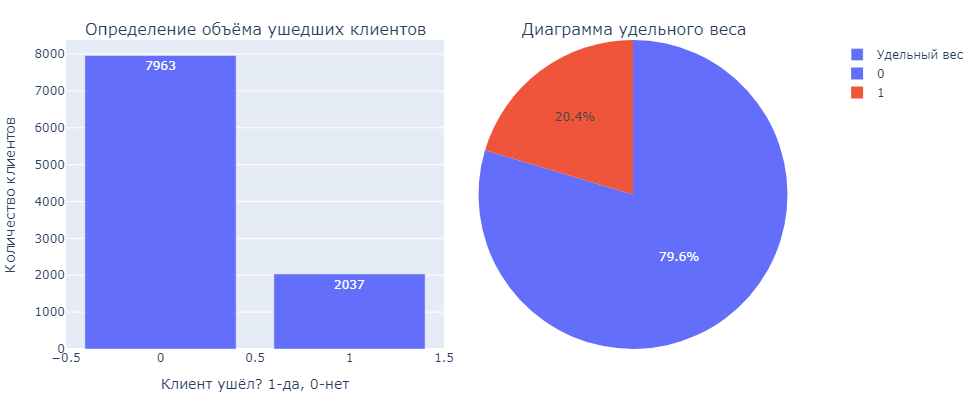

In [297]:
plots_bar_pie(df, 'churn', "Клиент ушёл? 1-да, 0-нет", "Количество клиентов", 'Определение объёма ушедших клиентов')

`Вывод:` из 100% клиентов, которые были когда-либо с банком 20.4% перестали пользоваться услугами банка.

---
## Финансовые показатели

Изучим как баланс на счёте связан с оттоком. Есть ли разница в балансах между ушедшими и оставшимися клиентами?

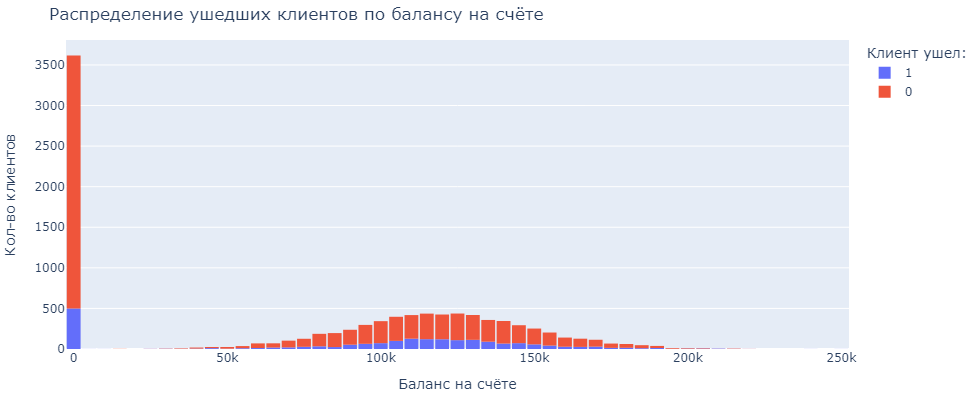

In [298]:
plots_histogram(df, "balance", 'Распределение ушедших клиентов по балансу на счёте',"Баланс на счёте", "Кол-во клиентов",
                color="churn", labels={'churn': 'Клиент ушел:'})

`Вывод:` обратим внимание на то, что есть много клиентов, которые работают с банком и у них на счёте баланс 0. Эти клиенты держат средства в другом банке? Или они на мели и им стоит предлагать кредиты?

Сконцентрируемся на тех, у кого на счёте есть деньги. Посмотрим как ушедшие распределены в зависимости от суммы на счёте:

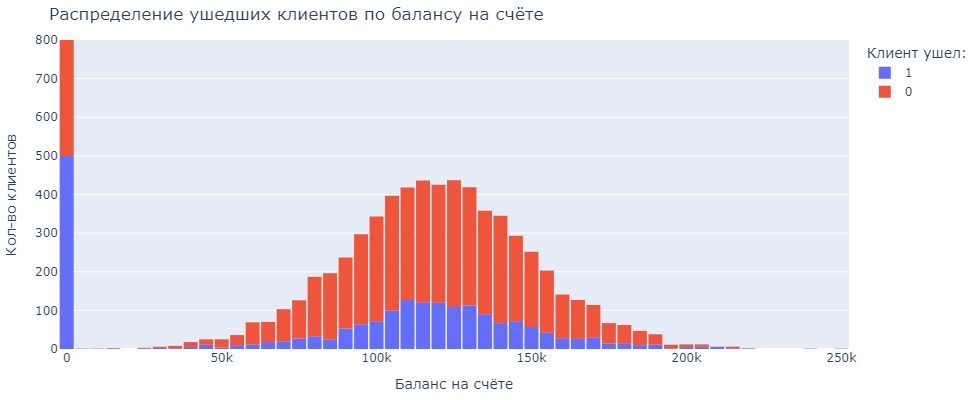

In [299]:
plots_histogram(df, "balance", 'Распределение ушедших клиентов по балансу на счёте',"Баланс на счёте", "Кол-во клиентов",
                color="churn", labels={'churn': 'Клиент ушел:'}, range_y=[0, 800])

`Вывод:` из тех клиентов, у которых на счёте есть деньги ушедшие распределены равномерно, без перекосов.

Изучим как кредитный рейтинг связан с вероятностью оттока клиентов:

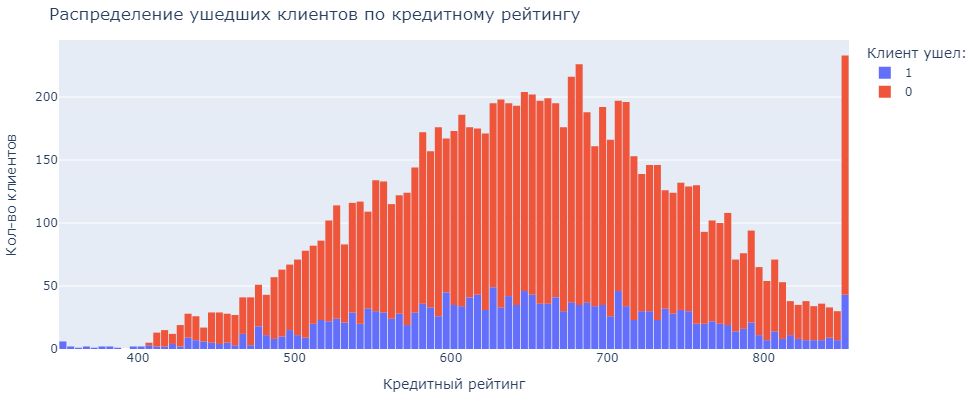

In [300]:
plots_histogram(df, "credit_score", 'Распределение ушедших клиентов по кредитному рейтингу',"Кредитный рейтинг", "Кол-во клиентов",
                color="churn", labels={'churn': 'Клиент ушел:'})

`Вывод:` мы видим, что ушедшие клиенты по кредитному рейтингу распределены равномерно.

Изучим как предполагаемая зарплата связана с оттоком клиентов:

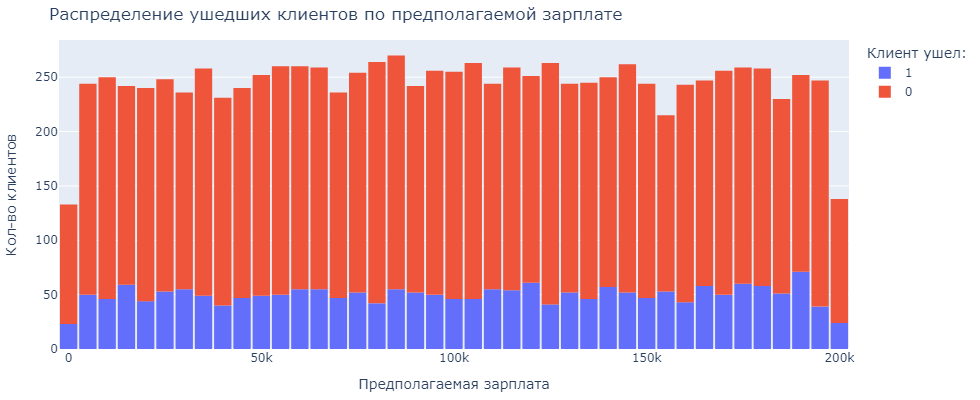

In [301]:
plots_histogram(df, "estimated_salary", 'Распределение ушедших клиентов по предполагаемой зарплате',"Предполагаемая зарплата", "Кол-во клиентов",
                color="churn", labels={'churn': 'Клиент ушел:'})

`Вывод:` мы видим, что ушедшие клиенты в зависимости от предполагаемой зарплаты распределены равномерно.

---
Изучим как ушедшие клиенты распределены по странам:

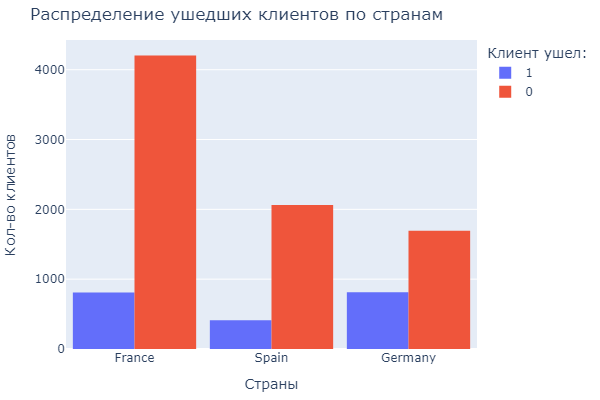

In [302]:
plots_histogram(df, "country", 'Распределение ушедших клиентов по странам',"Страны", "Кол-во клиентов",
                color="churn", barmode="group", width=600, labels={'churn': 'Клиент ушел:'})

`Вывод:` ушедшие клиенты есть в каждой стране и в Германии их удельный вес выше, чем в других странах.

Изучим как ушедшие клиенты распределены по возрастам:

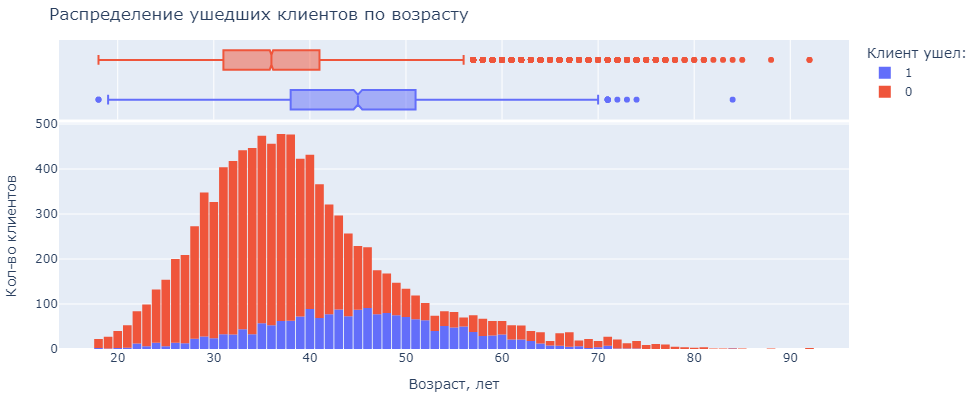

In [303]:
plots_histogram(df, "age", 'Распределение ушедших клиентов по возрасту',"Возраст, лет", "Кол-во клиентов",
                color="churn", marginal="box", labels={'churn': 'Клиент ушел:'})

`Вывод:` анализ распределения ушедших клиентов по возрасту показывает интересную картину: если наибольшее кол-во клиентов в диапазоне возраста 30-40 лет, то наибольшее кол-во ушедших клиентов в диапазоне возраста 40-50 лет.

Изучим как ушедшие клиенты распределены по сроку использования услуг банка:

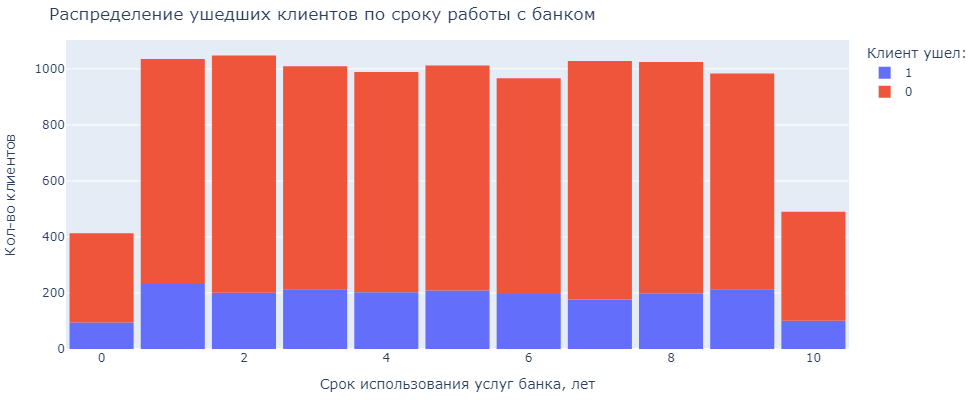

In [304]:
plots_histogram(df, "tenure", 'Распределение ушедших клиентов по сроку работы с банком',"Срок использования услуг банка, лет",
                "Кол-во клиентов", color="churn", labels={'churn': 'Клиент ушел:'})

`Вывод:` мы видим, что клиенты уходят на разном сроке использования услуг банка примерно в одинаковом проценте случаев.

Изучим как ушедшие клиенты распределены по кол-ву продуктов банка, которые они до этого использовали:

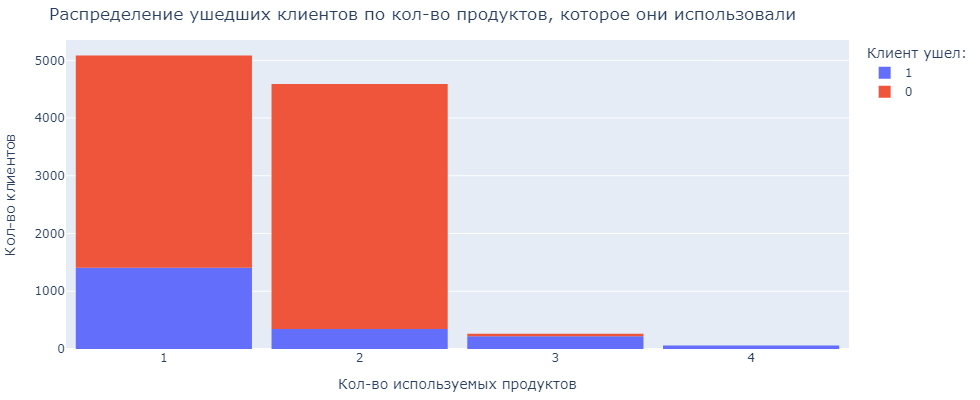

In [305]:
plots_histogram(df, "products_number", 'Распределение ушедших клиентов по кол-во продуктов, которое они использовали',
                "Кол-во используемых продуктов", "Кол-во клиентов", color="churn", labels={'churn': 'Клиент ушел:'})

`Вывод:` мы видим, что ушли большая часть или все клиенты, кто использовал по 3-4 продукта банка. Также большой % клиентов ушёл при использовании 1 продукта и меньше всего, кто использовал 2 продукта.